In [1]:
# load libraries and scripts
include("../scripts/tools.jl")
include("../scripts/plotting.jl")
include("../scripts/get_grid.jl")
include("../scripts/get_params.jl")
include("../scripts/stable.jl")
include("../scripts/dynamics.jl")
include("../scripts/disturbances.jl")

local_disturbance (generic function with 1 method)

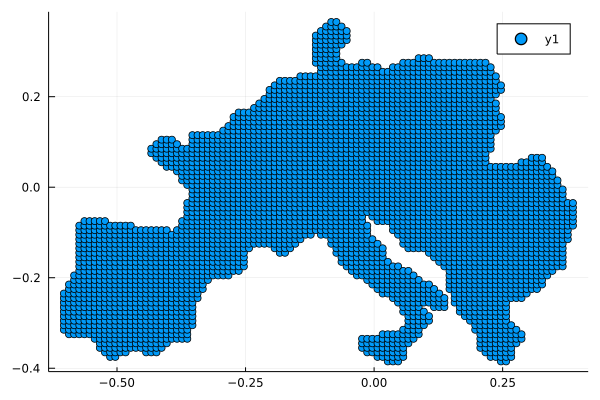

In [2]:
#load borders
border, scale_factor = import_border("../data/borders/border.json")
#border = border
# create the lattice grid
dx = 0.01
Nx, Ny, xrange, yrange, isinside, isborder, n = get_grid(border, Float64(dx))
isgrid = isinside .| isborder
# define x and y coordinate for plotting
#x = repeat(reshape(xrange,1,Nx), Ny, 1)
#y = repeat(reshape(yrange,Ny,1), 1, Nx);
coord = Float64.(reshape([],0,2))
for j in 1:Nx
    for i in 1:Ny
        #if(isgrid[i,j])
        #    coord = [coord; reshape([yrange[i] xrange[j]], 1, 2)]
        #end
        coord = [coord; reshape([yrange[i] xrange[j]], 1, 2)]
    end
end
coord = Float64.(coord)
#vec(isborder')
scatter(coord[vec(isgrid),2],coord[vec(isgrid),1])

In [15]:
# compute or load grid parameters
include("../scripts/get_params.jl")
bx, by, p, m, d = get_params_diff_fast(isinside, n, Float64(dx), coord, scale_factor, "../data/disc/pantagruel.h5",
    "../numerics/grid_params_" * string(dx) * ".h5", Niter=5000, dmax = 0.01, patch=0.002, bmin=0.01, tau=10.0)

asdf
asdf
asdf
[79, 105]
10643
10748
8295


LoadError: ArgumentError: row indices I[k] must satisfy 1 <= I[k] <= m

In [4]:
v = local_disturbance_fast(coord[vec(isinside),:], [0.1; 0.1], 10.0, 0.05, dx)

3439-element Vector{Float64}:
 1.2524769342401053e-54
 6.455443409621175e-54
 3.1967644781138446e-53
 1.5209797218197694e-52
 6.95287509931187e-52
 3.053751212766176e-51
 1.288638486352582e-50
 5.2246447254400735e-50
 2.035216667514668e-49
 1.9656959677717473e-53
 1.0131475265985412e-52
 5.017151911349844e-52
 2.387096819517604e-51
 ⋮
 2.1315195582389979e-7
 4.556868746826408e-7
 9.359915715207043e-7
 1.847164515531615e-6
 3.502413650824063e-6
 6.380541202122345e-6
 1.11680106318745e-5
 1.5371714840784126e-7
 3.157386426987594e-7
 6.231052017142685e-7
 1.181471463983518e-6
 2.1523520939067103e-6

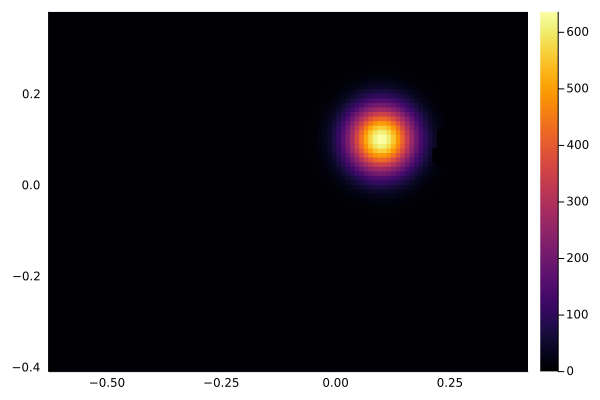

In [5]:
v2 = zeros(Nx * Ny)
#println(size(v2))
#println(size(isinside))
#println(size(v))
#println(sum(isinside))
v2[vec(isinside)] .= v 
heatmap(xrange, yrange, reshape(v2, Ny, Nx))

In [16]:
include("../scripts/get_params.jl")

println([Ny; Nx])
v3 = heat_diff_fast(vec(isinside), n, v2,dx, Ny, Nx, Niter = 1000, tau = 10.0);

[79, 105]
8017
8096
8295


In [ ]:
heatmap(xrange, yrange, reshape(v3, Ny, Nx))

In [ ]:
println(sum(v2))
println(sum(v3))